In [133]:
import pandas as pd
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [10]:
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)

with open('10M.pkl', 'wb') as f:
    pickle.dump(df, f)

with open('10M.pkl', 'rb') as f:
    df = pickle.load(f)

In [21]:
with open('../data/iplan_column_names.pkl', 'rb') as f:
    column_names = pickle.load(f)

#with open('../data/iplan_date_columns.pkl', 'rb') as f:
#    date_columns = pickle.load(f)
date_columns = ['accept_by_employee_date_time']

data_folder = '../data/'
data_file = 'repo_iplan_employee_in_shift_20200210-20200216.csv'

In [14]:
usecols = ['shift_id','accept_by_employee_date_time','pool_id']

In [22]:
df = pd.read_csv(data_folder+data_file,names=column_names, parse_dates=date_columns,usecols=usecols)

In [35]:
df1 = df.loc[~df.accept_by_employee_date_time.isnull()]

In [41]:
print(df.shape)
print(df1.shape)
print(len(np.unique(df.pool_id)))
print(len(np.unique(df1.pool_id)))

(248119, 3)
(120941, 3)
472
434


In [36]:
df1.head()

,shift_id,accept_by_employee_date_time,pool_id
0,131254489,2020-02-06 10:05:14,4550
1,131073033,2020-02-13 14:09:04,5314
6,131953810,2020-02-05 07:55:58,8222
7,131790645,2020-02-16 11:51:33,12102
9,128817253,2020-02-06 14:15:56,168


In [ ]:
# viz 1
    #count shifts (inique shift id) per pool 
    #count employees per shift (count shift id)

In [105]:
df2 = df1.groupby(['pool_id']).agg({
    'shift_id':lambda x: x.nunique(),
    'accept_by_employee_date_time':lambda x: x.count() / x.nunique()
}).reset_index()

In [106]:
df2cols = ['pool_id', 'shifts', 'employees_per_shift']
df2.columns = df2cols

In [115]:
mean_s = df2.shifts.mean()
mean_e = df2.employees_per_shift.mean()
meanrow = pd.DataFrame([['mean', mean_s, mean_e]], columns=df2cols, index=[1000])

,pool_id,shifts,employees_per_shift
431,20803,10.000000,1.866667
432,20843,19.000000,1.750000
433,20863,131.000000,3.145833
434,mean,120.034562,2.204648
435,mean,120.034562,2.204648


In [ ]:
# viz 2
    #count shifts (inique shift id) per pool 
    #count employees per pool

In [119]:
df3 = df1.groupby(['pool_id']).agg({
    'shift_id':lambda x: x.nunique(),
    'accept_by_employee_date_time':lambda x: x.count()
}).reset_index()

df3cols = ['pool_id', 'shifts', 'employees']
df3.columns = df3cols

mean_s = df3.shifts.mean()
mean_e = df3.employees.mean()
meanrow2 = pd.DataFrame([['mean', mean_s, mean_e]], columns=df3cols, index=[1000])

In [140]:
# viz 3
    # viz 1 as a hist

In [132]:
# viz 4
    # viz 2 as a hist

Text(0, 0.5, 'Employees per pool')

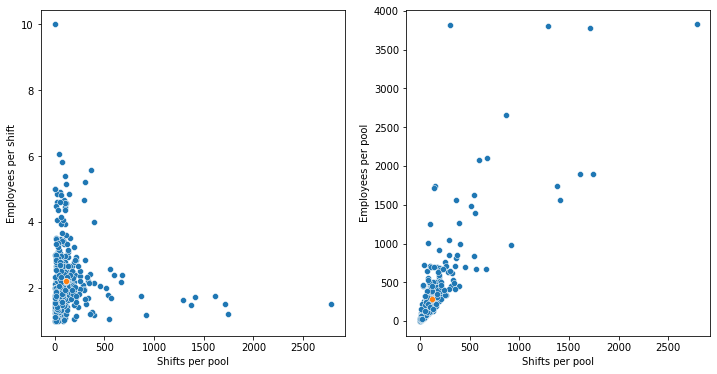

In [143]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                figsize=(12, 6))

sns.scatterplot(data=df2, x="shifts", y="employees_per_shift", ax=ax1)
sns.scatterplot(data=meanrow, x="shifts", y="employees_per_shift", ax=ax1, palette="deep")
ax1.set_xlabel('Shifts per pool')
ax1.set_ylabel('Employees per shift')

sns.scatterplot(data=df3, x="shifts", y="employees", ax=ax2)
sns.scatterplot(data=meanrow2, x="shifts", y="employees", ax=ax2, palette="deep")
ax2.set_xlabel('Shifts per pool')
ax2.set_ylabel('Employees per pool')



In [ ]:
# viz idea
    # shift length
    # shift start time 
    
# viz idea
    # shift count
    # day